<a href="https://colab.research.google.com/github/FarrazNouval/LGMVIP--DataScience/blob/main/Prediction_using_Decision_Tree_Agorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import required modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# analyze the data

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.columns = df.columns.map(lambda x: x.lower())
df.columns


Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

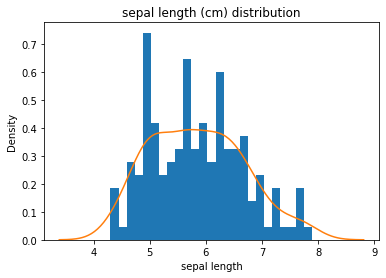

In [5]:
plt.hist(df.sepallengthcm, density=True, bins=25)
sns.kdeplot(x=df.sepallengthcm)
plt.title('sepal length (cm) distribution')
plt.xlabel('sepal length');


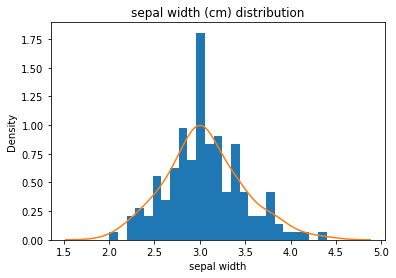

In [6]:
plt.hist(df.sepalwidthcm, density=True, bins=25)
sns.kdeplot(x=df.sepalwidthcm)
plt.title('sepal width (cm) distribution')
plt.xlabel('sepal width');


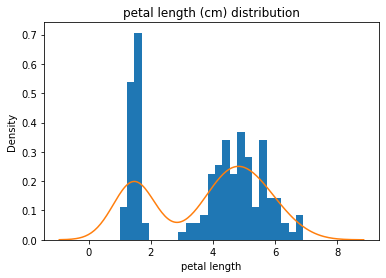

In [7]:
plt.hist(df.petallengthcm, density=True, bins=25)
sns.kdeplot(x=df.petallengthcm)
plt.title('petal length (cm) distribution')
plt.xlabel('petal length');


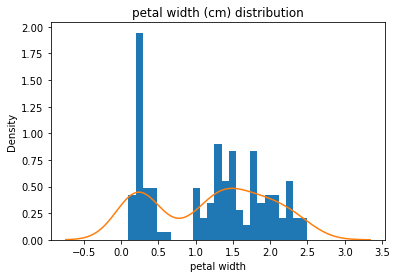

In [8]:
plt.hist(df.petalwidthcm, density=True, bins=25)
sns.kdeplot(x=df.petalwidthcm)
plt.title('petal width (cm) distribution')
plt.xlabel('petal width');


<Axes: >

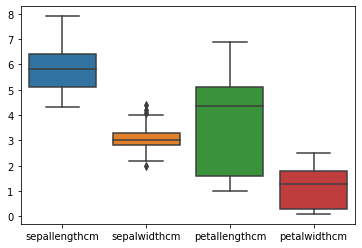

In [9]:
sns.boxplot(data=df[df.columns[1:]])


# prepare the data

In [10]:
features = df[df.columns[1:-1]].copy()
features.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm'], dtype='object')

In [11]:
# we just need to scale the data because all of features is numeric
# scale numeric features
scaler = MinMaxScaler()
scaler.fit(features.values)
df[features.columns] = scaler.transform(features.values)


In [12]:
df.describe().loc[['min', 'max']]

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
min,1.0,0.0,0.0,0.0,0.0
max,150.0,1.0,1.0,1.0,1.0


In [13]:
#split the data into train and test
train_feat, test_feat, train_target, test_target = train_test_split(df[df.columns[1:-1]],
                                                                    df['species'],
                                                                    test_size=0.2, 
                                                                    random_state=42)


In [14]:
train_feat.head()


,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
22,0.083333,0.666667,0.000000,0.041667
15,0.388889,1.000000,0.084746,0.125000
65,0.666667,0.458333,0.576271,0.541667
11,0.138889,0.583333,0.101695,0.041667
42,0.027778,0.500000,0.050847,0.041667


In [15]:
test_feat.head()


,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
73,0.500000,0.333333,0.627119,0.458333
18,0.388889,0.750000,0.118644,0.083333
118,0.944444,0.250000,1.000000,0.916667
78,0.472222,0.375000,0.593220,0.583333
76,0.694444,0.333333,0.644068,0.541667


In [16]:
train_target.head()


22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
11        Iris-setosa
42        Iris-setosa
Name: species, dtype: object

In [17]:
test_target.head()


73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: species, dtype: object

# build and train the model

In [18]:
# make decision tree instance
dt = DecisionTreeClassifier()
dt.fit(train_feat, train_target)


DecisionTreeClassifier()

In [19]:
# evaluate the model
dt_train_preds = dt.predict(train_feat)
dt_train_acc = accuracy_score(train_target, dt_train_preds)
dt_test_preds = dt.predict(test_feat)
dt_test_acc = accuracy_score(test_target, dt_test_preds)
dt_train_report = classification_report(train_target, dt_train_preds)
dt_test_report = classification_report(test_target, dt_test_preds)


In [20]:
# search the best params
dt_params = {'criterion':['gini', 'entropy', 'log_loss'], 
             'splitter':['best', 'random'], 
             'max_features':['auto', 'sqrt', 'log2'], 
             'max_depth':np.arange(50, 501, 50)}
dt_gs = GridSearchCV(dt, dt_params, cv=3)
dt_gs.fit(train_feat, train_target)
print(dt_gs.best_params_)

{'criterion': 'entropy', 'max_depth': 450, 'max_features': 'log2', 'splitter': 'random'}


In [21]:
dt_gs_preds = dt_gs.predict(train_feat)
dt_gs_acc = accuracy_score(train_target, dt_gs_preds)
dt_gs_report = classification_report(train_target, dt_gs_preds)

dt_gs_test = dt_gs.predict(test_feat)
dt_gs_test_acc = accuracy_score(test_target, dt_gs_test)
dt_gs_test_report = classification_report(test_target, dt_gs_test)

In [22]:
# model report
print(f'decision tree train acc = {dt_train_acc}')
print(f'decision tree test acc = {dt_test_acc}')
print(f'decision tree train report = \n {dt_train_report}')
print(f'decision tree test report = \n {dt_test_report}')
print(f'decision tree grid accuracy = {dt_gs_acc}')
print(f'decision tree grid report = \n {dt_gs_report}')
print(f'decision tree grid test accuracy = {dt_gs_test_acc}')
print(f'decision tree grid test report = \n {dt_gs_test_report}')


decision tree train acc = 1.0
decision tree test acc = 1.0
decision tree train report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      1.00      1.00        41
 Iris-virginica       1.00      1.00      1.00        39

       accuracy                           1.00       120
      macro avg       1.00      1.00      1.00       120
   weighted avg       1.00      1.00      1.00       120

decision tree test report = 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

decision tree grid accuracy = 1.0
decision tree grid report = 
             

In [23]:
# make a model using best parameter
model = DecisionTreeClassifier(criterion='gini',
                               max_depth=350,
                               max_features='log2',
                               splitter='best')
model.fit(train_feat, train_target)


DecisionTreeClassifier(max_depth=350, max_features='log2')

In [24]:
model.predict(test_feat[:5])

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [25]:
test_target[:5]

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
Name: species, dtype: object

In [26]:
df.columns

Index(['id', 'sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

# make prediction function

In [27]:
def predicts(sepallengthcm, sepalwidthcm, petallengthcm, petalwidthcm):
  data = {'sepallengthcm': sepallengthcm,
          'sepalwidthcm': sepalwidthcm,
          'petallengthcm': petallengthcm,
          'petalwidthcm': petalwidthcm}
  
  df = pd.DataFrame([data])
  df[df.columns] = scaler.transform(df.values)
  pred = model.predict(df.values)
  return pred

In [28]:
predicts(2, 3, 2, 1)

array(['Iris-setosa'], dtype=object)